# Breast Cancer Type Classification

### Prupose 

Health promotion for early detection; timely diagnosis; and comprehensive breast cancer management.

### Objectives 

1. Early detection of breast cancer by accurately classifying the cancerous cells. 
2. Help in tailoring treatment plans for individual patients. 
3. Provide higher accuracy rates in breast cancer classification. 

In [815]:
import math
import numpy as np
import pandas as pd 
import seaborn as sns
import os
import matplotlib.pyplot as plt
!pip install mlxtend

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Importing Data

In [816]:
print(os.listdir())

['.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.mcu8051ide', '.packettracer', '.spyder-py3', '.vscode', '3D Objects', 'anaconda3', 'AppData', 'Application Data', 'Breast Cancer Wisconsin .ipynb', 'breast-cancer-wiscons.csv', 'Cisco Packet Tracer 8.2.1', 'Cleaned dataset clean again.ipynb', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'full_data.csv', 'healthcare-dataset-stroke-data.csv', 'House Pricing.csv', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'mcu8051ide_errors.log', 'Microsoft', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{fd4fe52f-96e2-11ed-9791-a6ed2054544c}.TM.blf', 'NTUSER.DAT{fd4fe52f-96e2-11ed-9791-a6ed2054544c}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{fd4fe52f-96e2-11ed-9791-a6ed2054544c}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PCManger', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'S

In [817]:
df = pd.read_csv("breast-cancer-wiscons.csv")
original_df = df.copy(deep=True)

In [818]:
original_df

idnumber  Clump Thickness  Uniformity of Cell Size  \
0     1000025                5                        1   
1     1002945                5                        4   
2     1015425                3                        1   
3     1016277                6                        8   
4     1017023                4                        1   
..        ...              ...                      ...   
694    776715                3                        1   
695    841769                2                        1   
696    888820                5                       10   
697    897471                4                        8   
698    897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   
1                           4                  5                            7   
2                           1                  1                            2   
3                           8                  1                            3   
4                           1                  3                            2   
..                        ...                ...                          ...   
694                         1                  1                            3   
695                         1                  1                            2   
696                        10                  3                            7   
697                         6                  4                            3   
698                         8                  5                            4   

    Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0             1                3                1        1      2  
1            10                3                2        1      2  
2             2                3                1        1      2  
3             4                3                7        1      2  
4             1                3                1        1      2  
..          ...              ...              ...      ...    ...  
694           2                1                1        1      2  
695           1                1                1        1      2  
696           3                8               10        2      4  
697           4               10                6        1      4  
698           5               10                4        1      4  

[699 rows x 11 columns]

In [819]:
target = 'class'
features = [i for i in original_df.columns if i not in [target]]
print('\nThe Dataset consists of {} features and {} samples.' .format(df.shape[1],df.shape[0]))


The Dataset consists of 11 features and 699 samples.


Attribute Information: 
1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

# Checking Information

In [820]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   idnumber                     699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [821]:
table = pd.DataFrame({'Unique':original_df.nunique(),'Null':original_df.isna().sum(),'Null Percent':original_df.isna().sum()/len(original_df),'Types':original_df.dtypes.values})
display(table)

Unique  Null  Null Percent   Types
idnumber                        645     0           0.0   int64
Clump Thickness                  10     0           0.0   int64
Uniformity of Cell Size          10     0           0.0   int64
Uniformity of Cell Shape         10     0           0.0   int64
Marginal Adhesion                10     0           0.0   int64
Single Epithelial Cell Size      10     0           0.0   int64
Bare Nuclei                      11     0           0.0  object
Bland Chromatin                  10     0           0.0   int64
Normal Nucleoli                  10     0           0.0   int64
Mitoses                           9     0           0.0   int64
Class                             2     0           0.0   int64

# Simple Cleaning

## Removing Irrelevant Data 

In [822]:
# remove the idnumber column
removed_df = original_df.drop('idnumber', axis=1)

# print the updated dataframe
removed_df

Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
0                    1                            2           1   
1                    5                            7          10   
2                    1                            2           2   
3                    1                            3           4   
4                    3                            2           1   
..                 ...                          ...         ...   
694                  1                            3           2   
695                  1                            2           1   
696                  3                            7           3   
697                  4                            3           4   
698                  5                            4           5   

     Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                  3                1        1      2  
1                  3                2        1      2  
2                  3                1        1      2  
3                  3                7        1      2  
4                  3                1        1      2  
..               ...              ...      ...    ...  
694                1                1        1      2  
695                1                1        1      2  
696                8               10        2      4  
697               10                6        1      4  
698               10                4        1      4  

[699 rows x 10 columns]

## Cleaning Duplicates 

In [823]:
subnet = ['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
duplicateClean_df=removed_df.drop_duplicates(subnet) 
duplicateClean_df

Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
693                3                        1                         1   
694                3                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
0                    1                            2           1   
1                    5                            7          10   
2                    1                            2           2   
3                    1                            3           4   
4                    3                            2           1   
..                 ...                          ...         ...   
693                  1                            2           1   
694                  1                            3           2   
696                  3                            7           3   
697                  4                            3           4   
698                  5                            4           5   

     Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                  3                1        1      2  
1                  3                2        1      2  
2                  3                1        1      2  
3                  3                7        1      2  
4                  3                1        1      2  
..               ...              ...      ...    ...  
693                2                1        2      2  
694                1                1        1      2  
696                8               10        2      4  
697               10                6        1      4  
698               10                4        1      4  

[463 rows x 10 columns]

## Cleaning Empty Values 

In [824]:
# Replace '?' with NaN
simpleClean_df = duplicateClean_df.copy()
simpleClean_df = simpleClean_df.replace('?', np.nan)

# Count the number of missing values in each column
num_missing = simpleClean_df.isnull().sum()

# Determine the availability of missing values
avail_missing = simpleClean_df.isnull().any()

# Combine the two dataframes
missing_df = pd.concat([num_missing, avail_missing], axis=1)
missing_df.columns = ['Num Missing', 'Missing?']

# Print the resulting table
print(missing_df)

                             Num Missing  Missing?
Clump Thickness                        0     False
Uniformity of Cell Size                0     False
Uniformity of Cell Shape               0     False
Marginal Adhesion                      0     False
Single Epithelial Cell Size            0     False
Bare Nuclei                           14      True
Bland Chromatin                        0     False
Normal Nucleoli                        0     False
Mitoses                                0     False
Class                                  0     False


In [825]:
#Extract rows with missing columns 
missing_values = ['?']
simpleClean_df = simpleClean_df.replace(missing_values, pd.NA)
missing_rows = simpleClean_df[simpleClean_df.isna().any(axis=1)]
missing_rows

Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
23                 8                        4                         5   
40                 6                        6                         6   
139                1                        1                         1   
145                1                        1                         3   
158                1                        1                         2   
164                5                        1                         1   
235                3                        1                         4   
249                3                        1                         1   
275                3                        1                         3   
292                8                        8                         8   
294                1                        1                         1   
297                5                        4                         3   
315                4                        6                         5   
617                1                        1                         1   

     Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
23                   1                            2         NaN   
40                   9                            6         NaN   
139                  1                            1         NaN   
145                  1                            2         NaN   
158                  1                            3         NaN   
164                  1                            2         NaN   
235                  1                            2         NaN   
249                  1                            2         NaN   
275                  1                            2         NaN   
292                  1                            2         NaN   
294                  1                            2         NaN   
297                  1                            2         NaN   
315                  6                            7         NaN   
617                  1                            1         NaN   

     Bland Chromatin  Normal Nucleoli  Mitoses  Class  
23                 7                3        1      4  
40                 7                8        1      2  
139                2                1        1      2  
145                2                1        1      2  
158                1                1        1      2  
164                3                1        1      2  
235                3                1        1      2  
249                3                1        1      2  
275                2                1        1      2  
292                6               10        1      4  
294                2                1        1      2  
297                2                3        1      2  
315                4                9        1      2  
617                1                1        1      2

Regression Imputation: 
using regression models to predict missing values based on other features in the dataset

In [826]:
#Regression Imputation to replace empty values 

# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a copy of the DataFrame to perform imputation
impute_df = simpleClean_df.copy()

# Split the data into train and test sets
train_data = impute_df[impute_df['Bare Nuclei'].notnull()]
test_data = impute_df[impute_df['Bare Nuclei'].isnull()]

# Define the input and output features for regression
X_train = train_data.drop(['Bare Nuclei'], axis=1)
y_train = train_data['Bare Nuclei']
X_test = test_data.drop(['Bare Nuclei'], axis=1)

# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the missing values
imputed_values = lr.predict(X_test)

# Replace the missing values in the DataFrame
impute_df.loc[impute_df['Bare Nuclei'].isnull(), 'Bare Nuclei'] = imputed_values

# Print the DataFrame after imputation
impute_df

Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
693                3                        1                         1   
694                3                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
0                    1                            2           1   
1                    5                            7          10   
2                    1                            2           2   
3                    1                            3           4   
4                    3                            2           1   
..                 ...                          ...         ...   
693                  1                            2           1   
694                  1                            3           2   
696                  3                            7           3   
697                  4                            3           4   
698                  5                            4           5   

     Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                  3                1        1      2  
1                  3                2        1      2  
2                  3                1        1      2  
3                  3                7        1      2  
4                  3                1        1      2  
..               ...              ...      ...    ...  
693                2                1        2      2  
694                1                1        1      2  
696                8               10        2      4  
697               10                6        1      4  
698               10                4        1      4  

[463 rows x 10 columns]

In [827]:
#Check whether empty values still available 

# Count the number of missing values in each column
num_missing = impute_df.isnull().sum()

# Determine the availability of missing values
avail_missing = impute_df.isnull().any()

# Combine the two dataframes
missing_df = pd.concat([num_missing, avail_missing], axis=1)
missing_df.columns = ['Num Missing', 'Missing?']

# Print the resulting table
print(missing_df)

                             Num Missing  Missing?
Clump Thickness                        0     False
Uniformity of Cell Size                0     False
Uniformity of Cell Shape               0     False
Marginal Adhesion                      0     False
Single Epithelial Cell Size            0     False
Bare Nuclei                            0     False
Bland Chromatin                        0     False
Normal Nucleoli                        0     False
Mitoses                                0     False
Class                                  0     False


## Fix Structural Errors 

In [828]:
print(removed_df.dtypes)

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object


In [829]:
impute_df['Bare Nuclei'] = impute_df['Bare Nuclei'].astype('int64')

In [830]:
print(impute_df.dtypes)

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object


## Removal of Outliers

In [831]:
# Compute the IQR for each feature
Q1 = impute_df.quantile(0.25)
Q3 = impute_df.quantile(0.75)
IQR = Q3 - Q1

# Filter the outliers
filtered_df = impute_df[~((impute_df < (Q1 - 1.5 * IQR)) |(impute_df > (Q3 + 1.5 * IQR))).any(axis=1)]

filtered_df

Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
693                3                        1                         1   
694                3                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    1                            2            1   
1                    5                            7           10   
2                    1                            2            2   
3                    1                            3            4   
4                    3                            2            1   
..                 ...                          ...          ...   
693                  1                            2            1   
694                  1                            3            2   
696                  3                            7            3   
697                  4                            3            4   
698                  5                            4            5   

     Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                  3                1        1      2  
1                  3                2        1      2  
2                  3                1        1      2  
3                  3                7        1      2  
4                  3                1        1      2  
..               ...              ...      ...    ...  
693                2                1        2      2  
694                1                1        1      2  
696                8               10        2      4  
697               10                6        1      4  
698               10                4        1      4  

[393 rows x 10 columns]

# Exploratory Data Analysis (EDA)¶

## Data Description

In [832]:
#Data Description
filtered_df.describe().T

count      mean       std  min  25%  50%  75%  \
Clump Thickness              393.0  4.966921  2.770365  1.0  3.0  5.0  7.0   
Uniformity of Cell Size      393.0  3.605598  2.967454  1.0  1.0  3.0  5.0   
Uniformity of Cell Shape     393.0  3.730280  2.850622  1.0  1.0  3.0  6.0   
Marginal Adhesion            393.0  3.208651  2.834234  1.0  1.0  2.0  4.0   
Single Epithelial Cell Size  393.0  3.231552  1.797056  1.0  2.0  2.0  4.0   
Bare Nuclei                  393.0  4.251908  3.734171  1.0  1.0  2.0  8.0   
Bland Chromatin              393.0  3.842239  2.505208  1.0  2.0  3.0  6.0   
Normal Nucleoli              393.0  3.366412  3.160356  1.0  1.0  1.0  6.0   
Mitoses                      393.0  1.229008  0.565571  1.0  1.0  1.0  1.0   
Class                        393.0  2.875318  0.993462  2.0  2.0  2.0  4.0   

                              max  
Clump Thickness              10.0  
Uniformity of Cell Size      10.0  
Uniformity of Cell Shape     10.0  
Marginal Adhesion            10.0  
Single Epithelial Cell Size   9.0  
Bare Nuclei                  10.0  
Bland Chromatin              10.0  
Normal Nucleoli              10.0  
Mitoses                       3.0  
Class                         4.0

## Class Samples Distribution

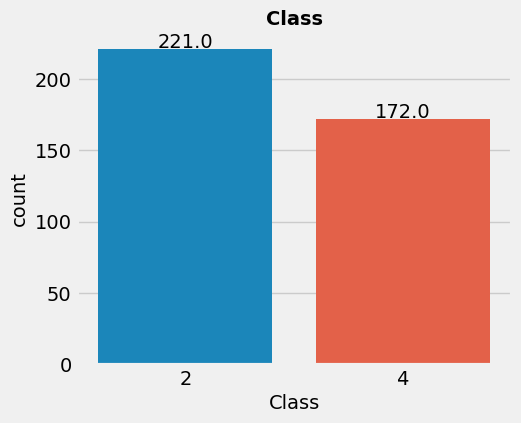

In [833]:
column =['Class']
plt.figure(figsize=(10,20))
for i, num in enumerate(column):
    ax = plt.subplot(rows, 2, i + 1)
    sns.countplot(x=filtered_df[num])
    plt.title(num, fontsize=14, fontweight='bold')
    
    #Add labels to the bars
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2,p.get_height()+0.5, p.get_height(),ha='center')

plt.tight_layout()

## Normal Distribution

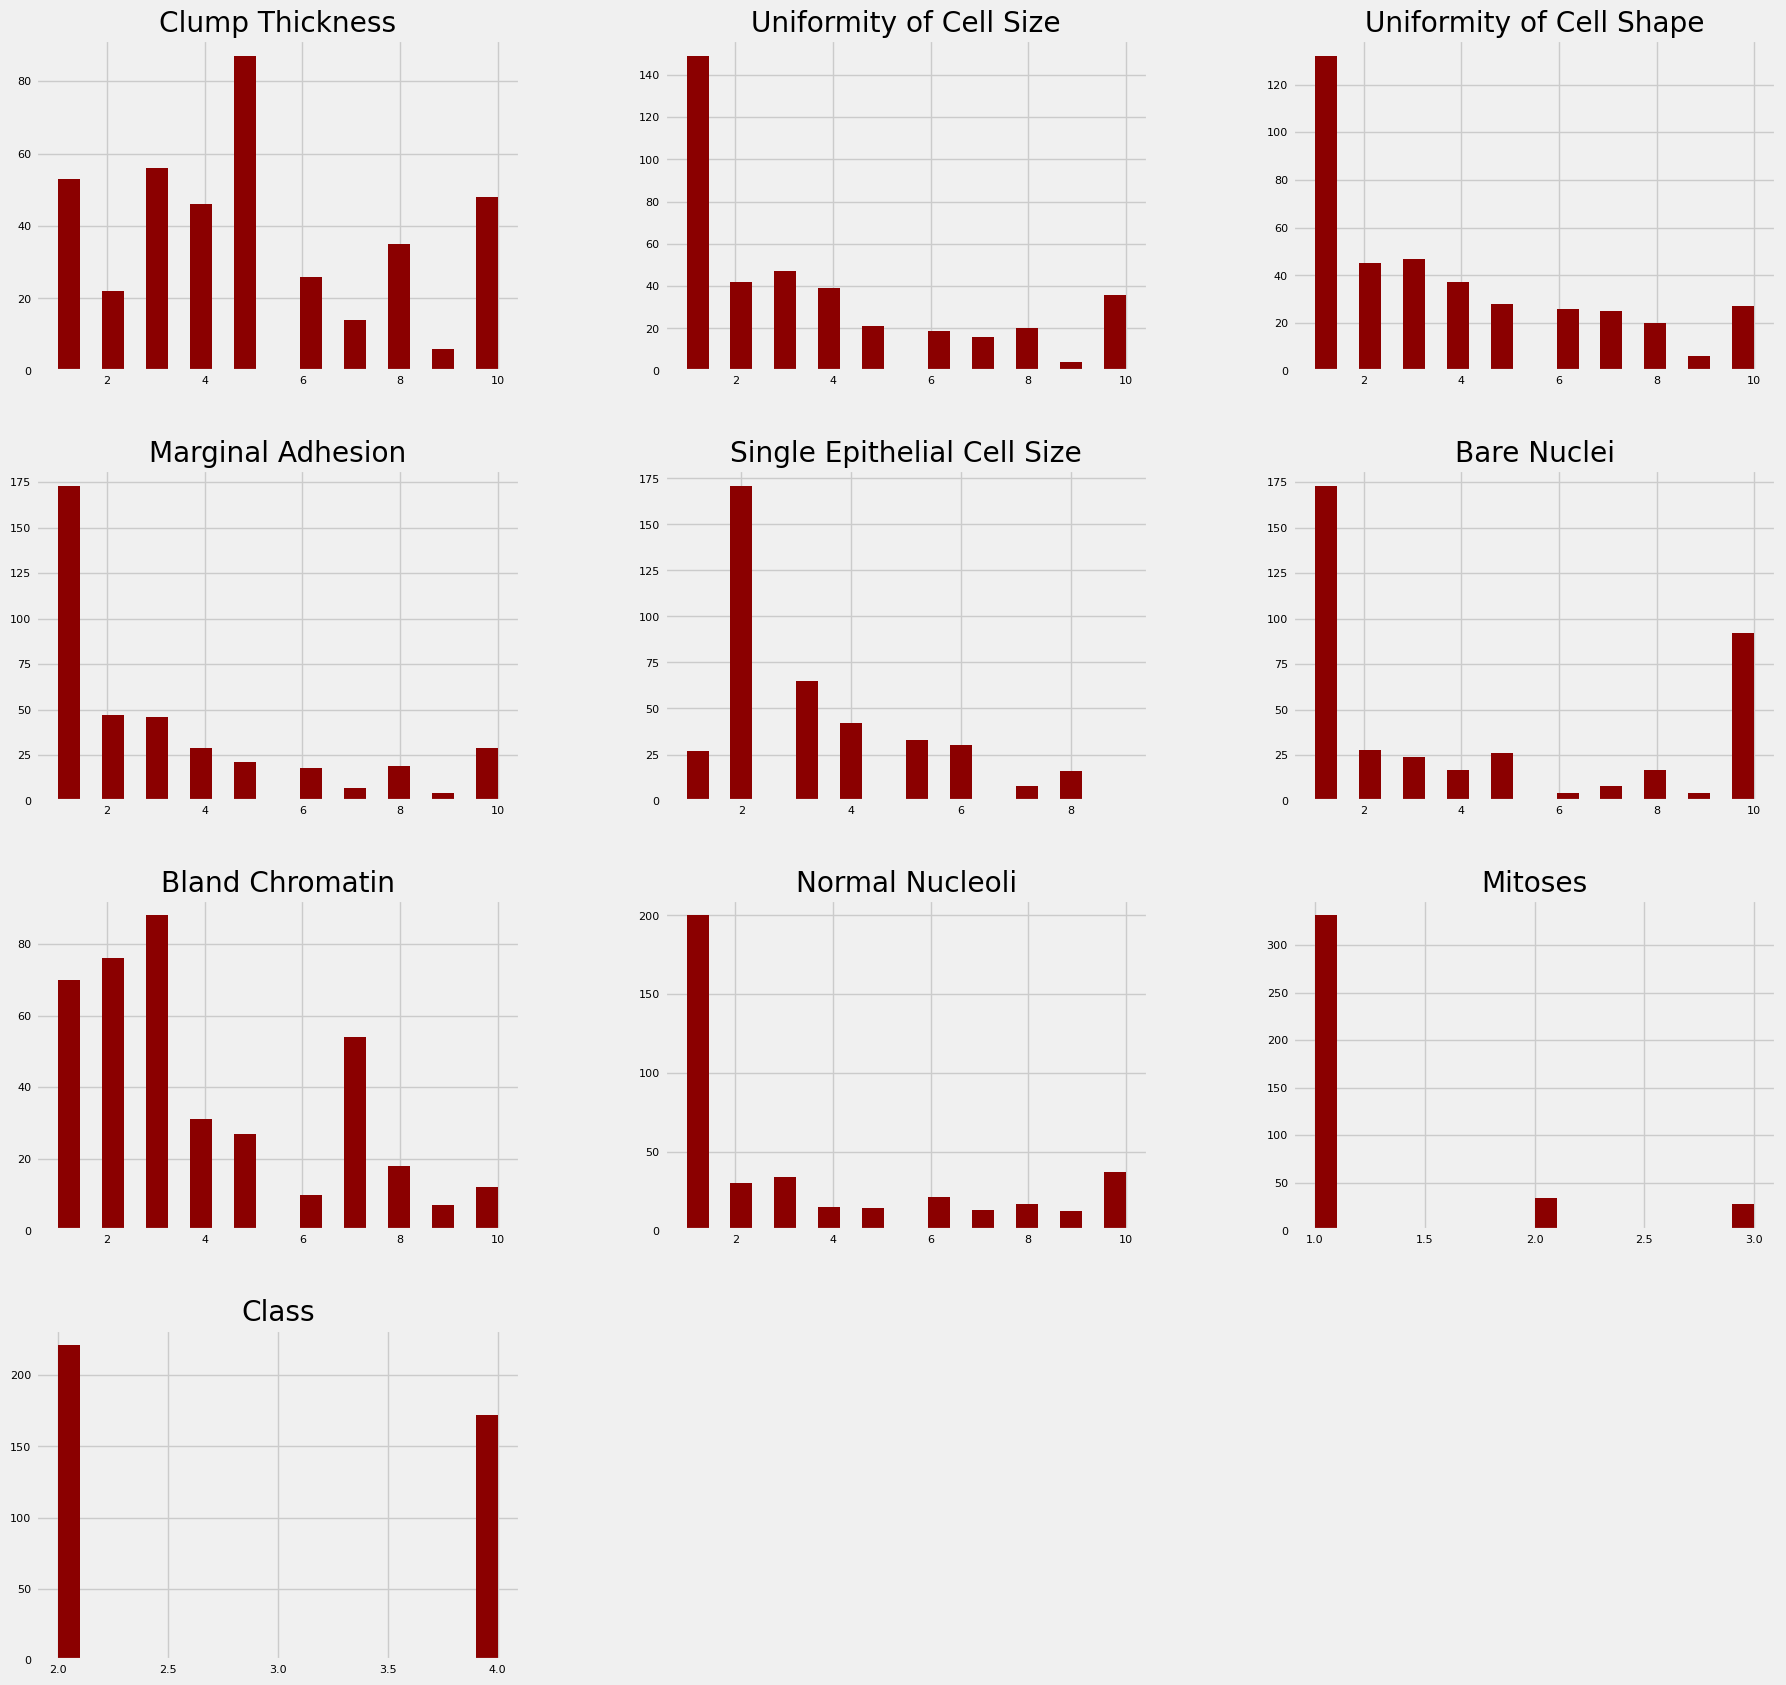

In [834]:
#Histogram that shows the number of counts based on the house's features 
filtered_df.hist(figsize=(20, 20), bins=20, xlabelsize=8, ylabelsize=8,color = "darkred");

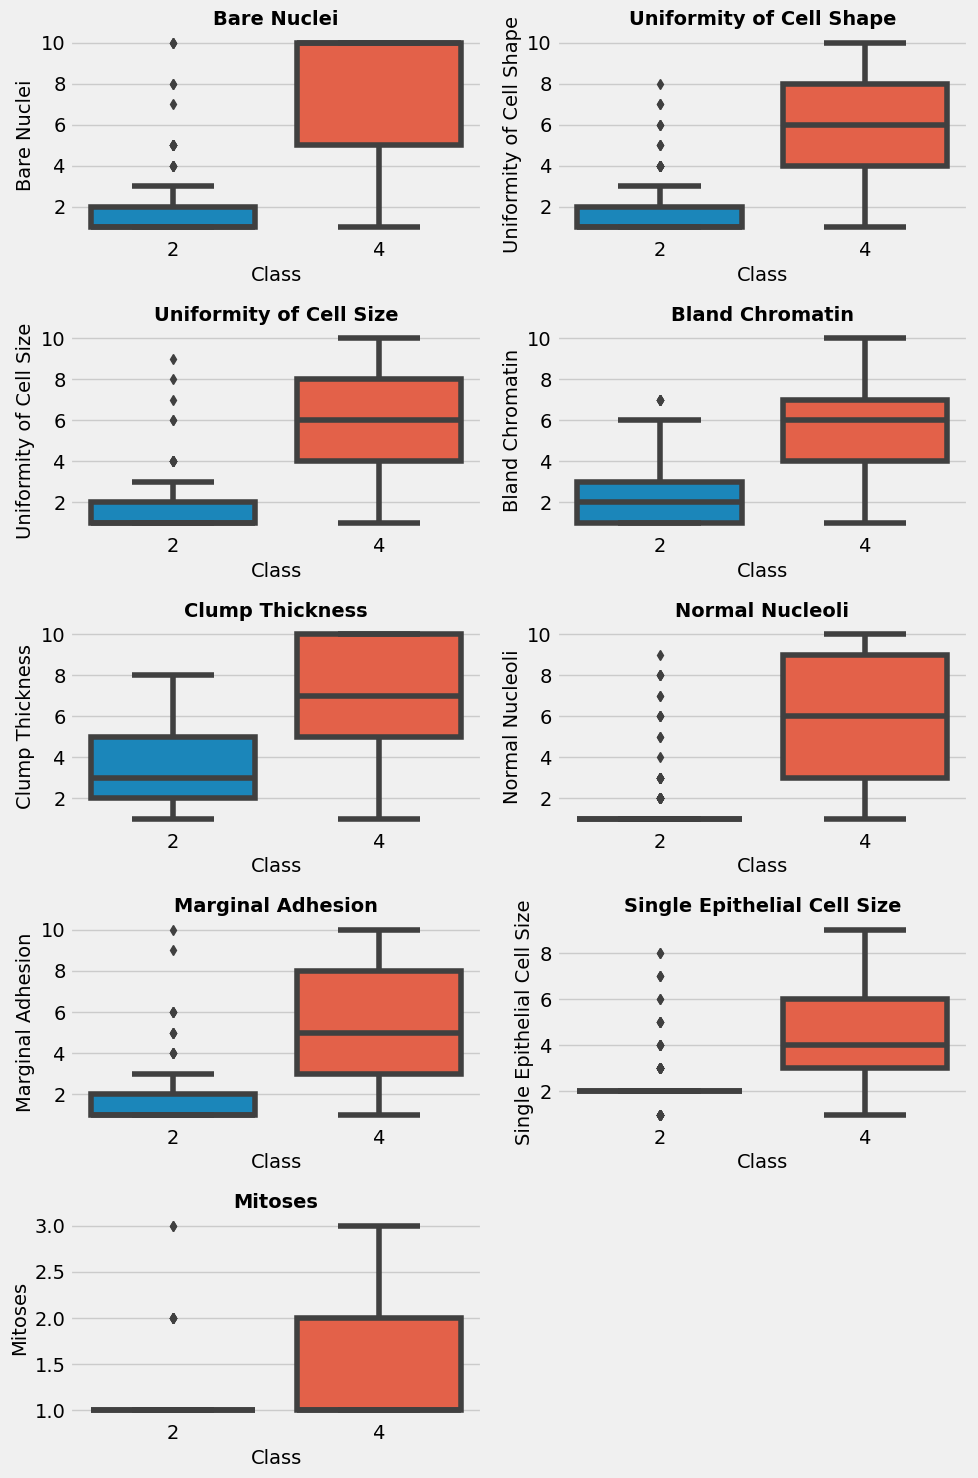

In [835]:
columns = ['Bare Nuclei', 'Uniformity of Cell Shape', 'Uniformity of Cell Size', 'Bland Chromatin', 'Clump Thickness', 'Normal Nucleoli', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Mitoses']

rows = len(columns) // 2 + len(columns) % 2

plt.figure(figsize=(10, 15))

for i, num in enumerate(columns):
    ax = plt.subplot(rows, 2, i + 1)
    sns.boxplot(x=filtered_df['Class'], y=impute_df[num])
    plt.title(num, fontsize=14, fontweight='bold')

plt.tight_layout()

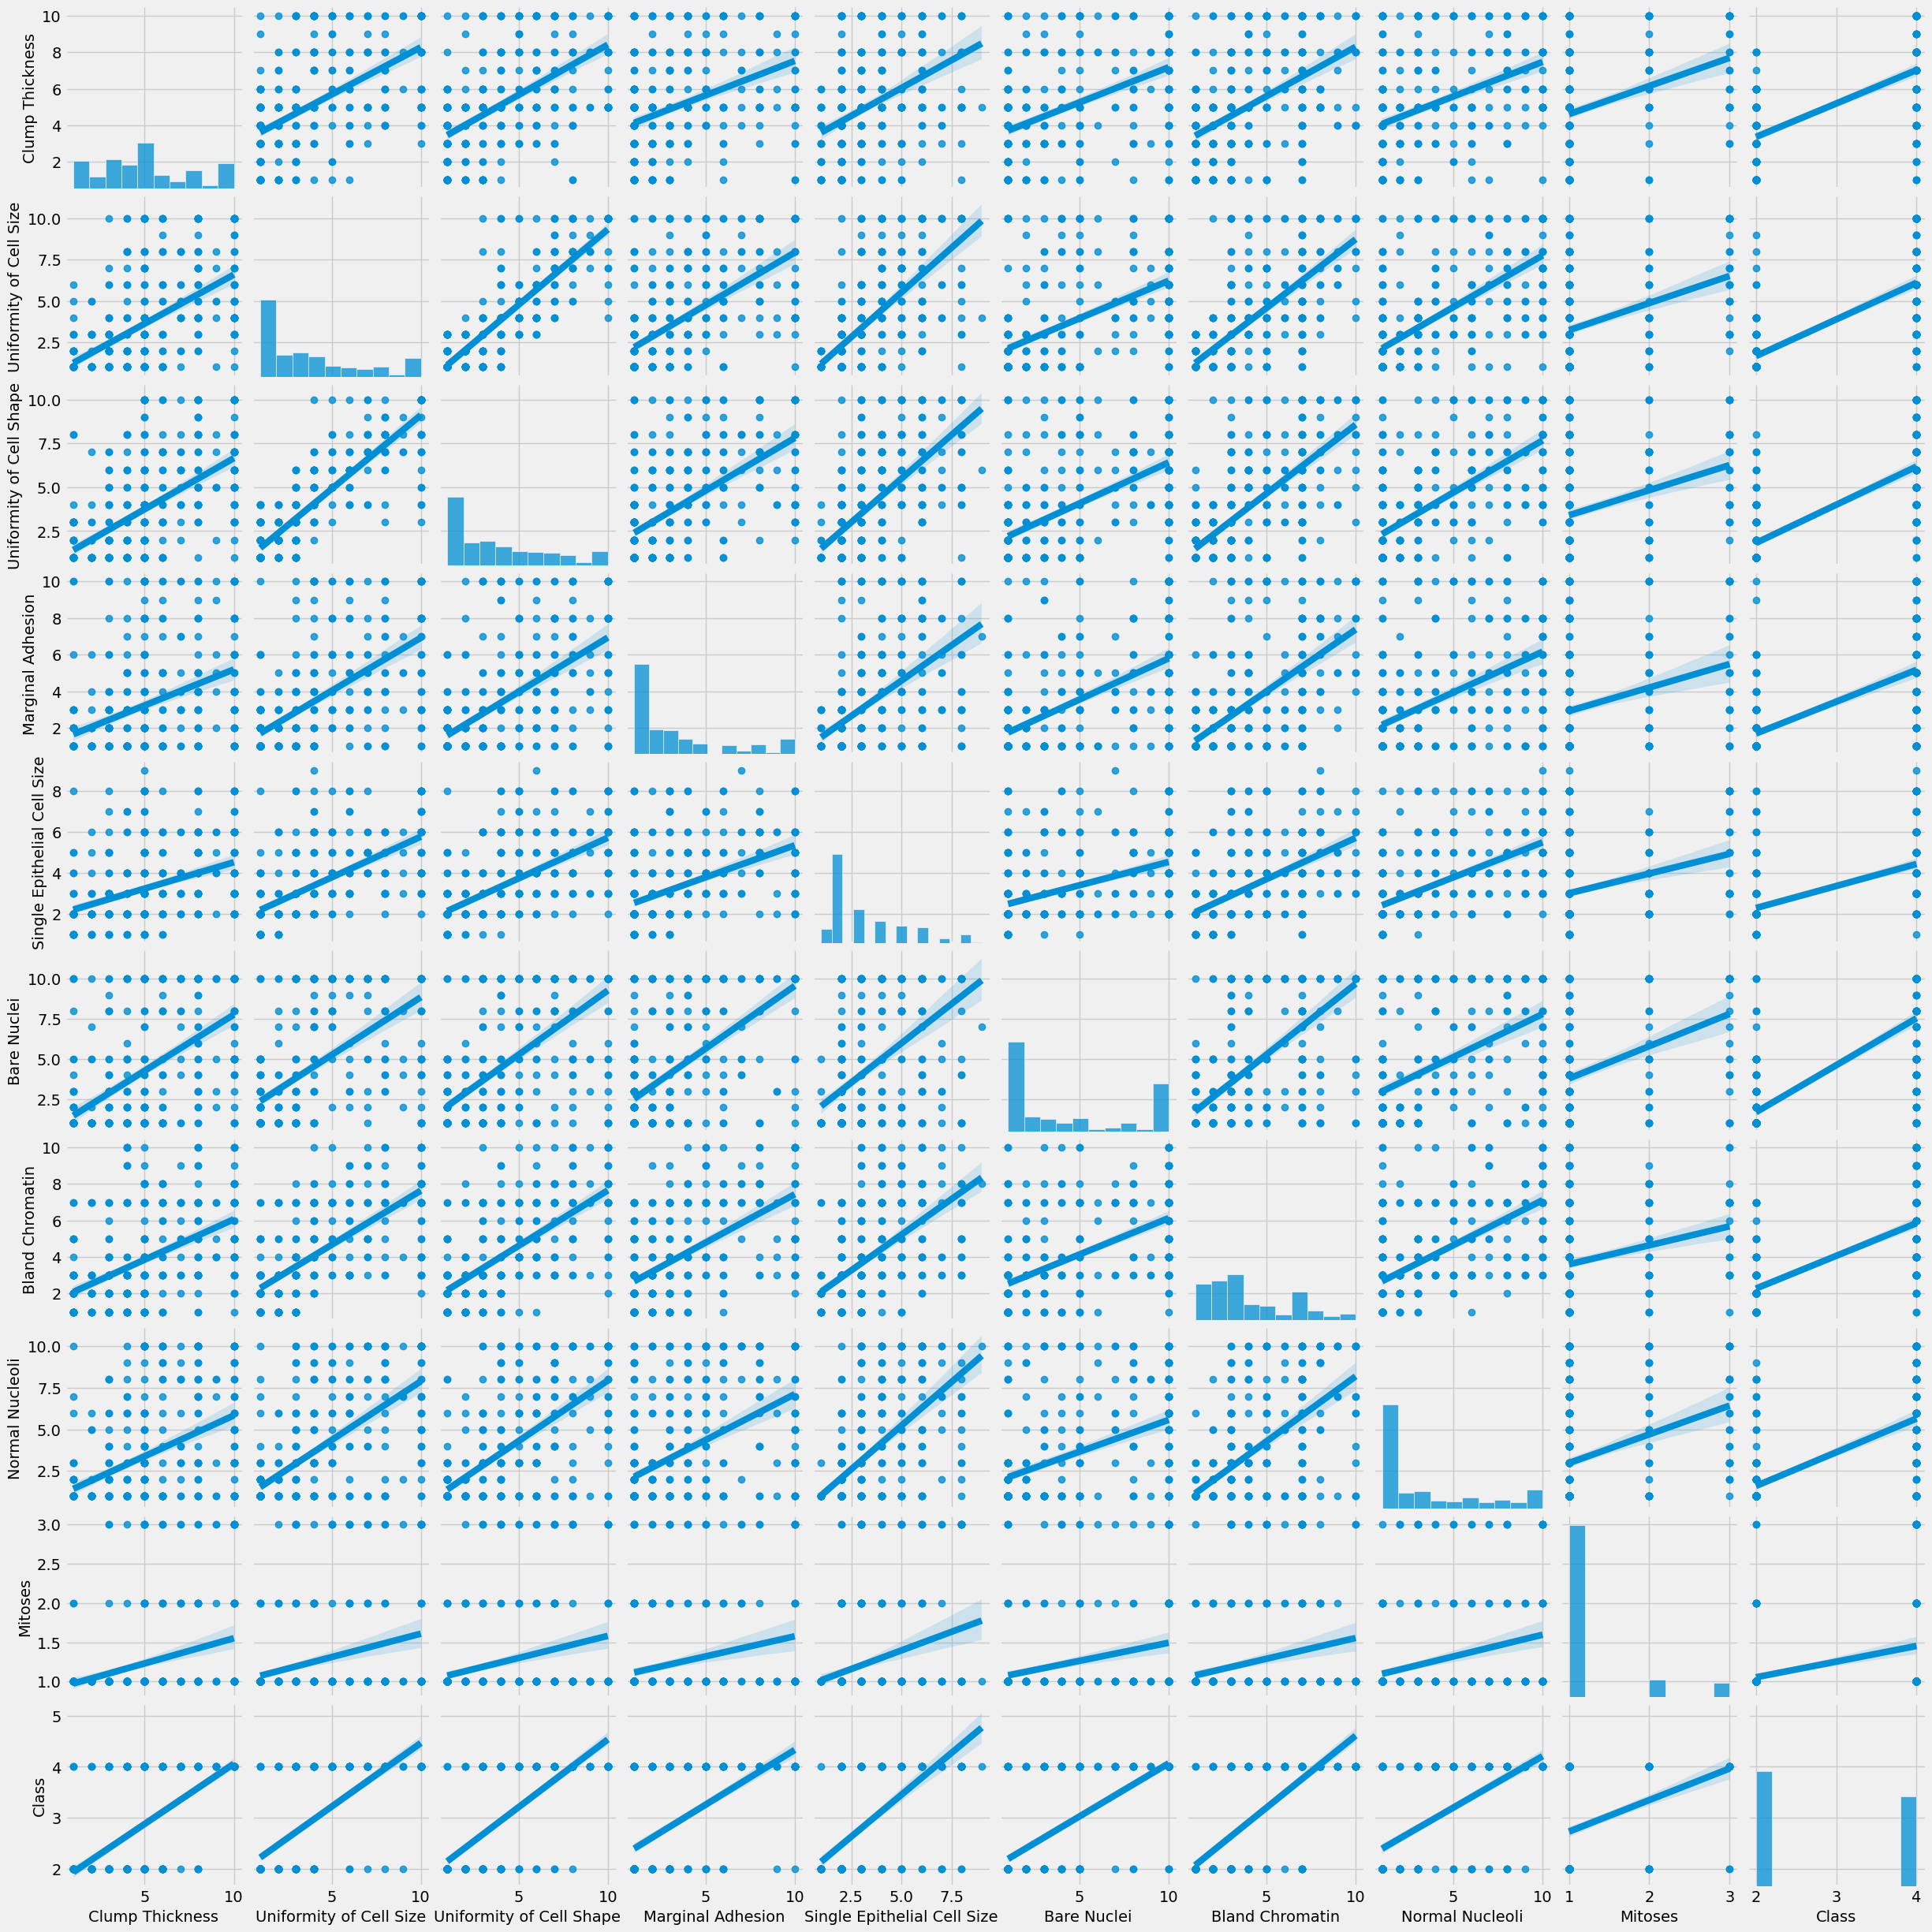

In [836]:
#Pairplot which shows the pairwise relationships 
sns.pairplot(filtered_df,kind="reg")

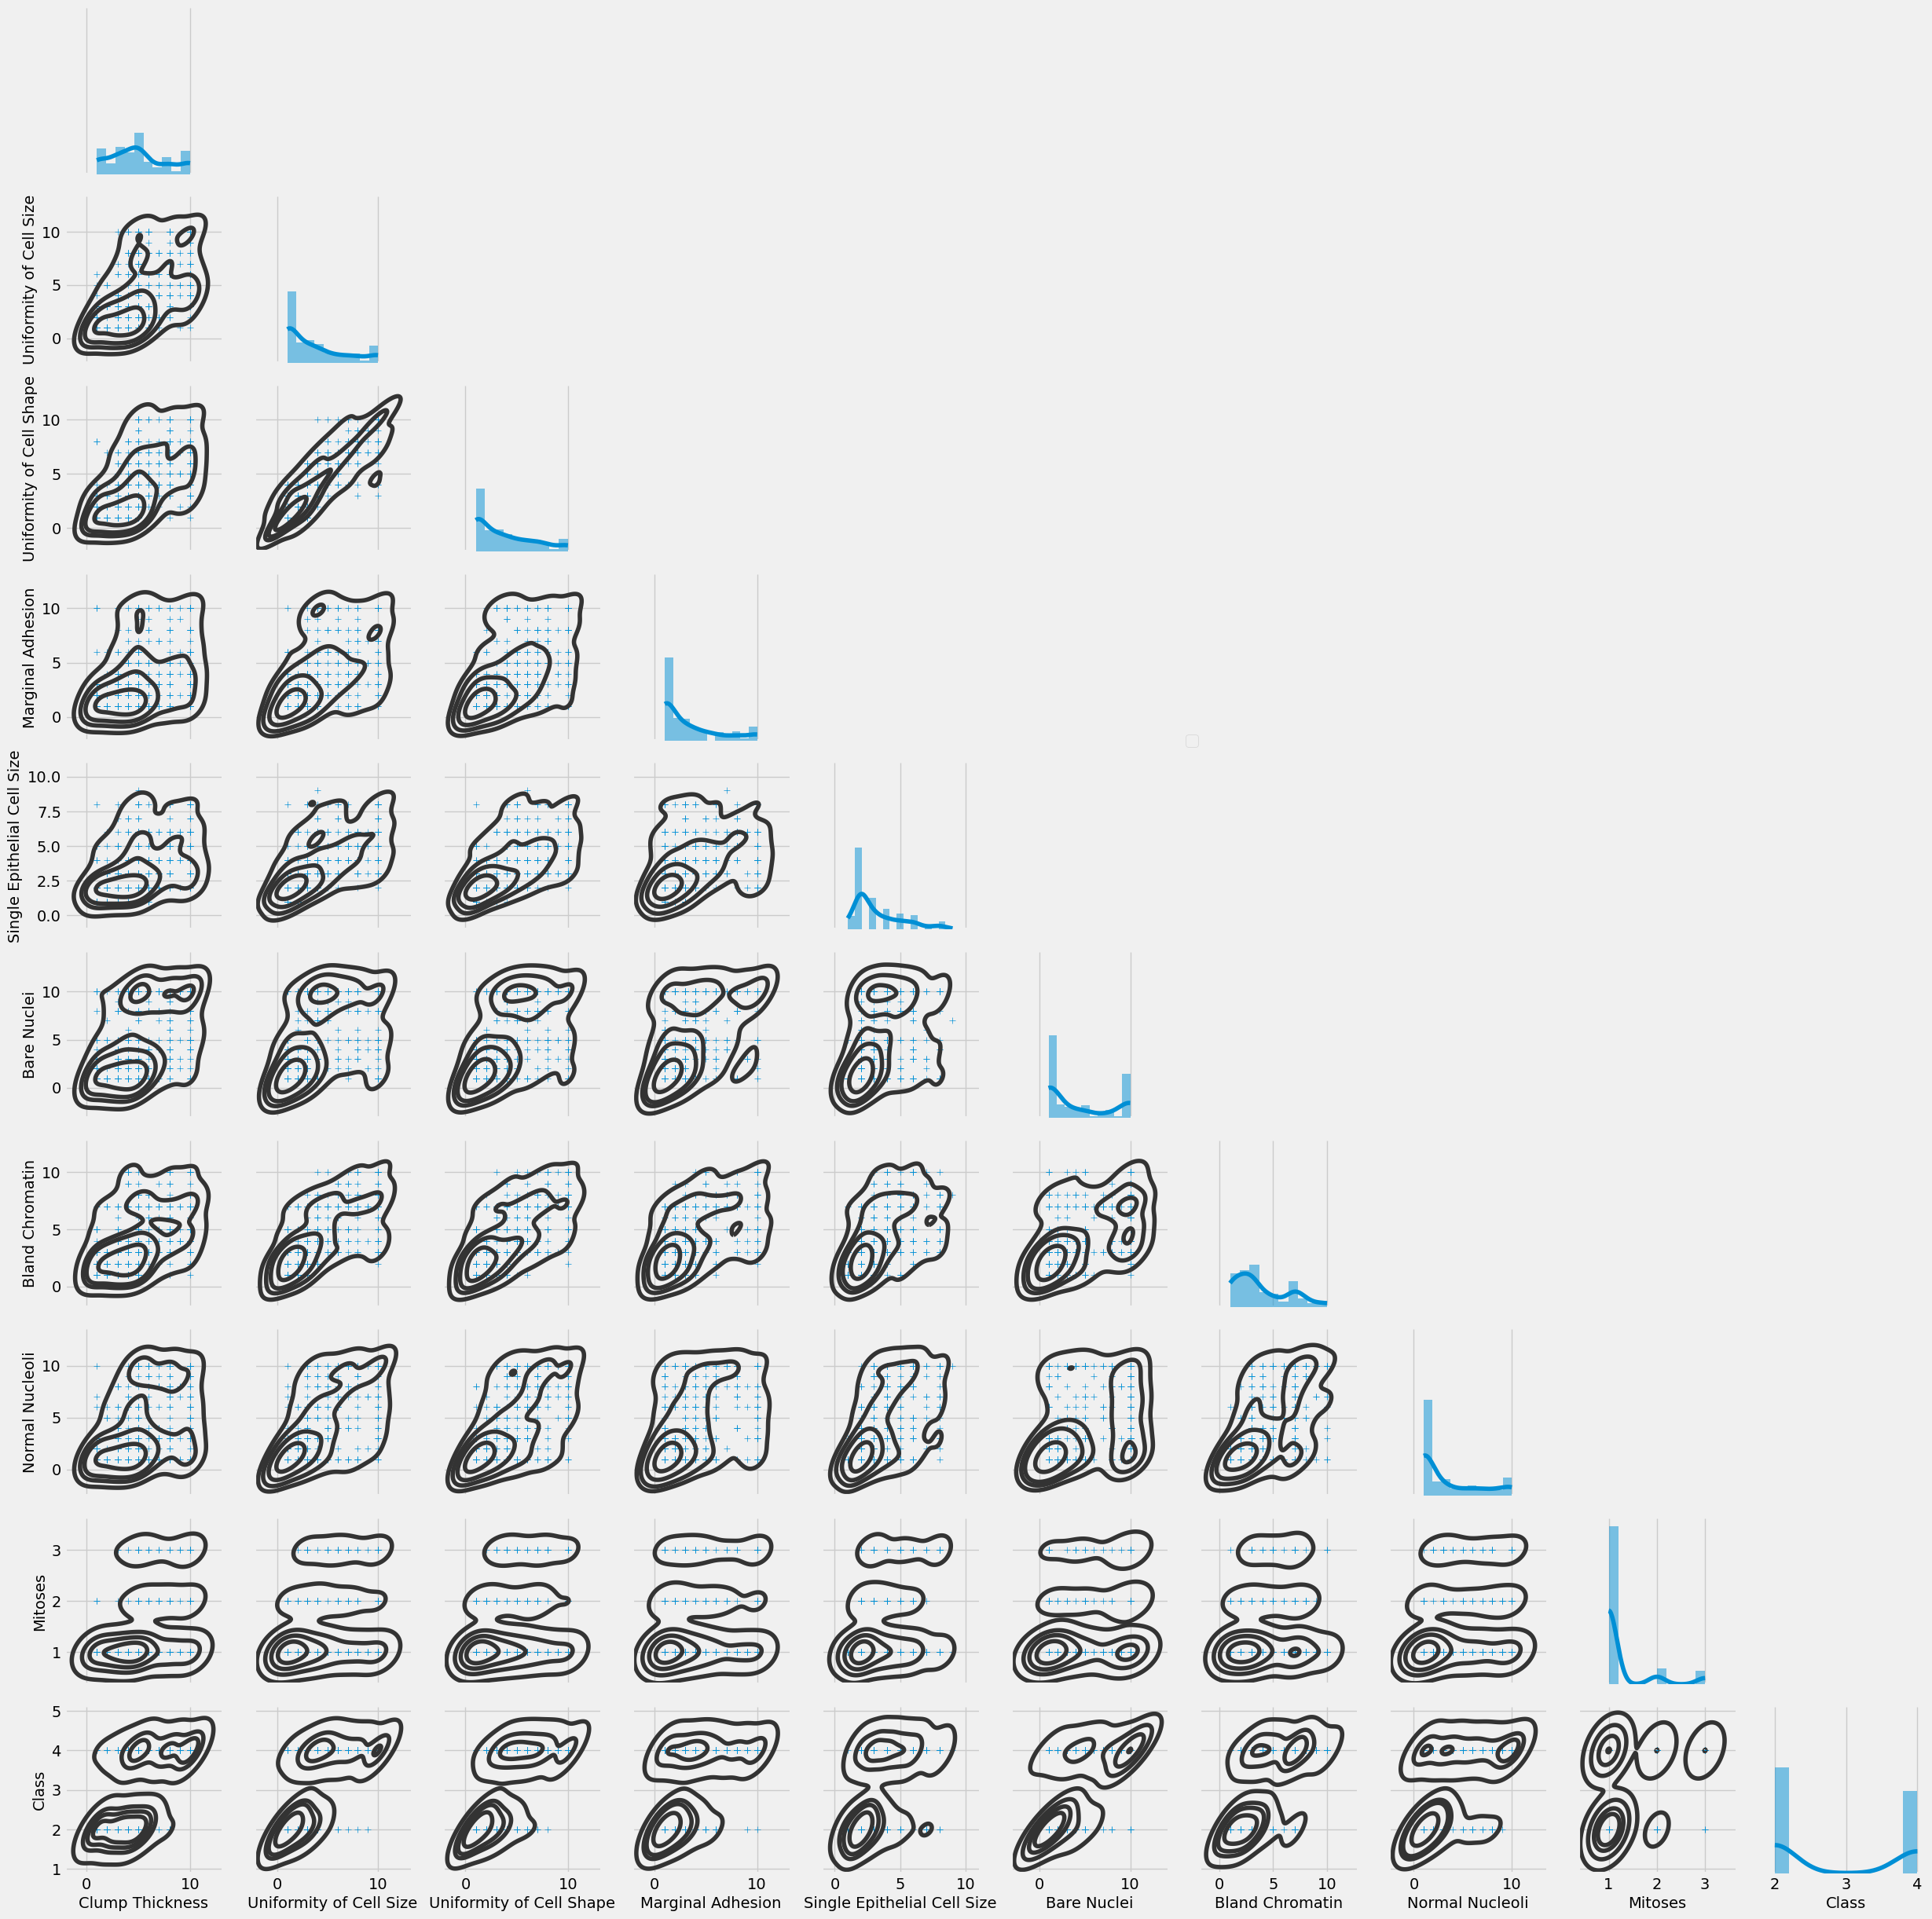

In [837]:
#PairGrid which shows the pairwise relationships between price, area bedrooms, batrooms, stories and parking
g = sns.PairGrid(filtered_df,  corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

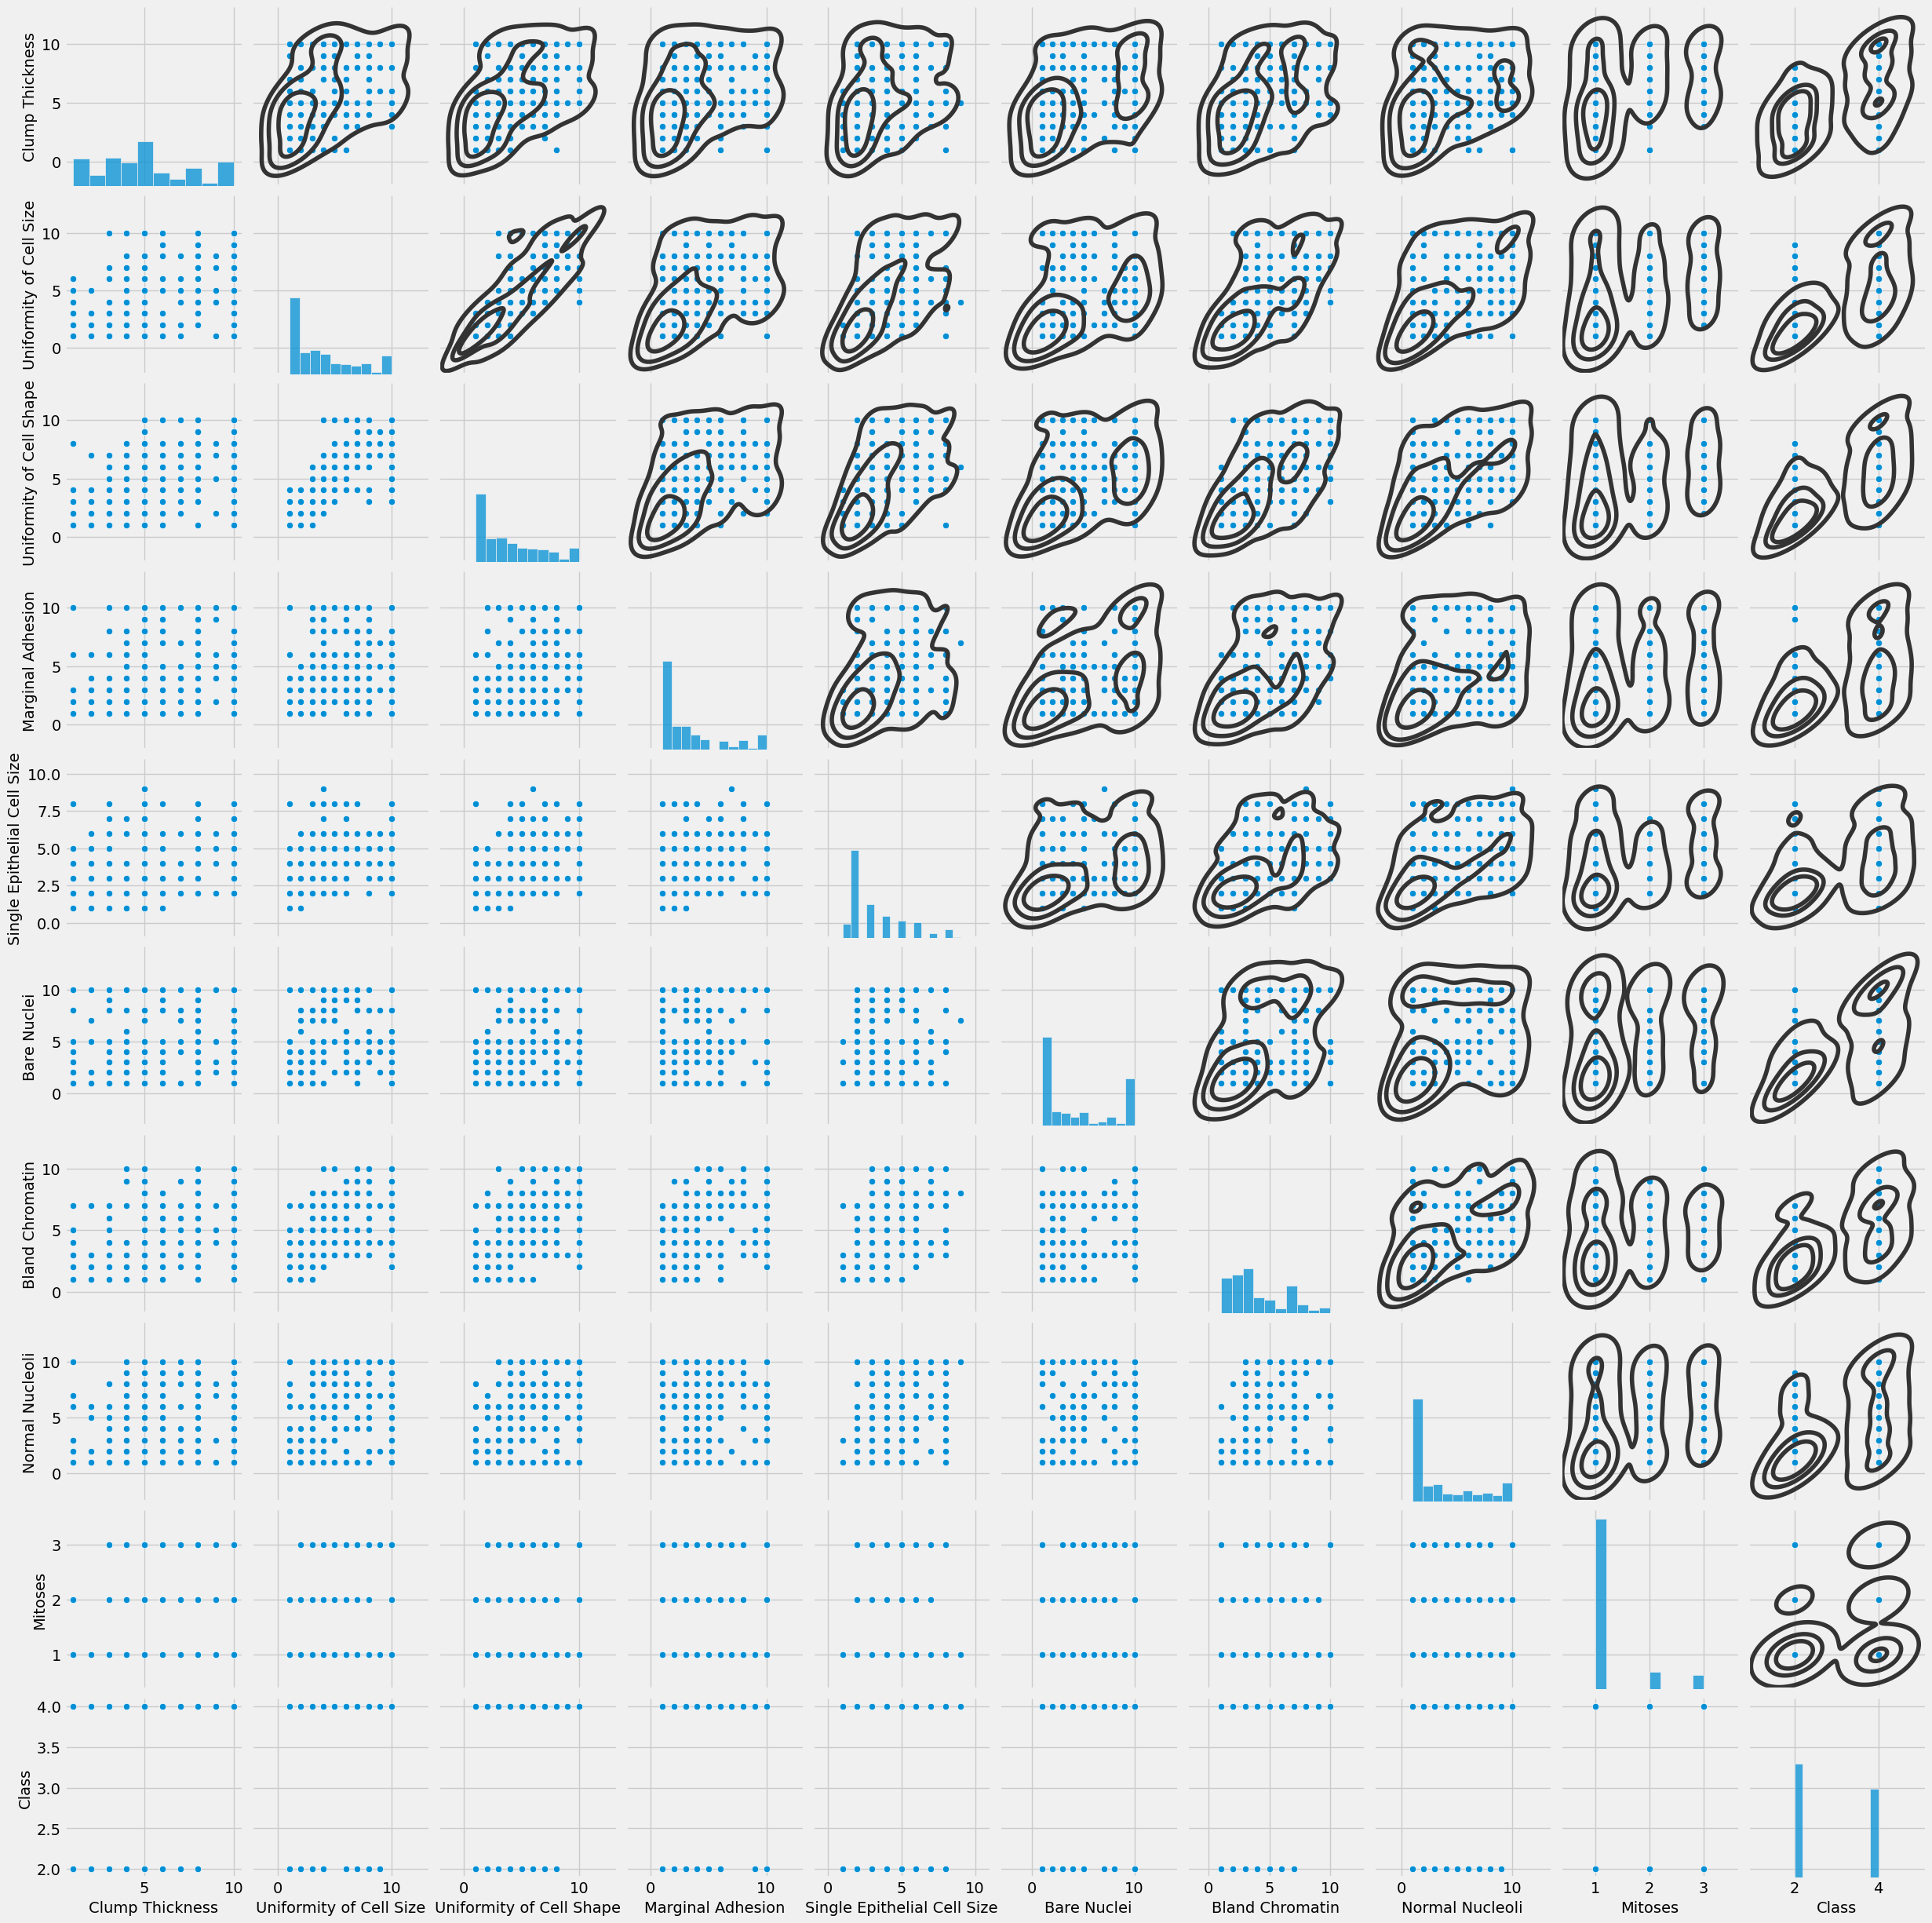

In [838]:
#PairGrid 
g = sns.pairplot(filtered_df)
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

## Heatmap Correlation

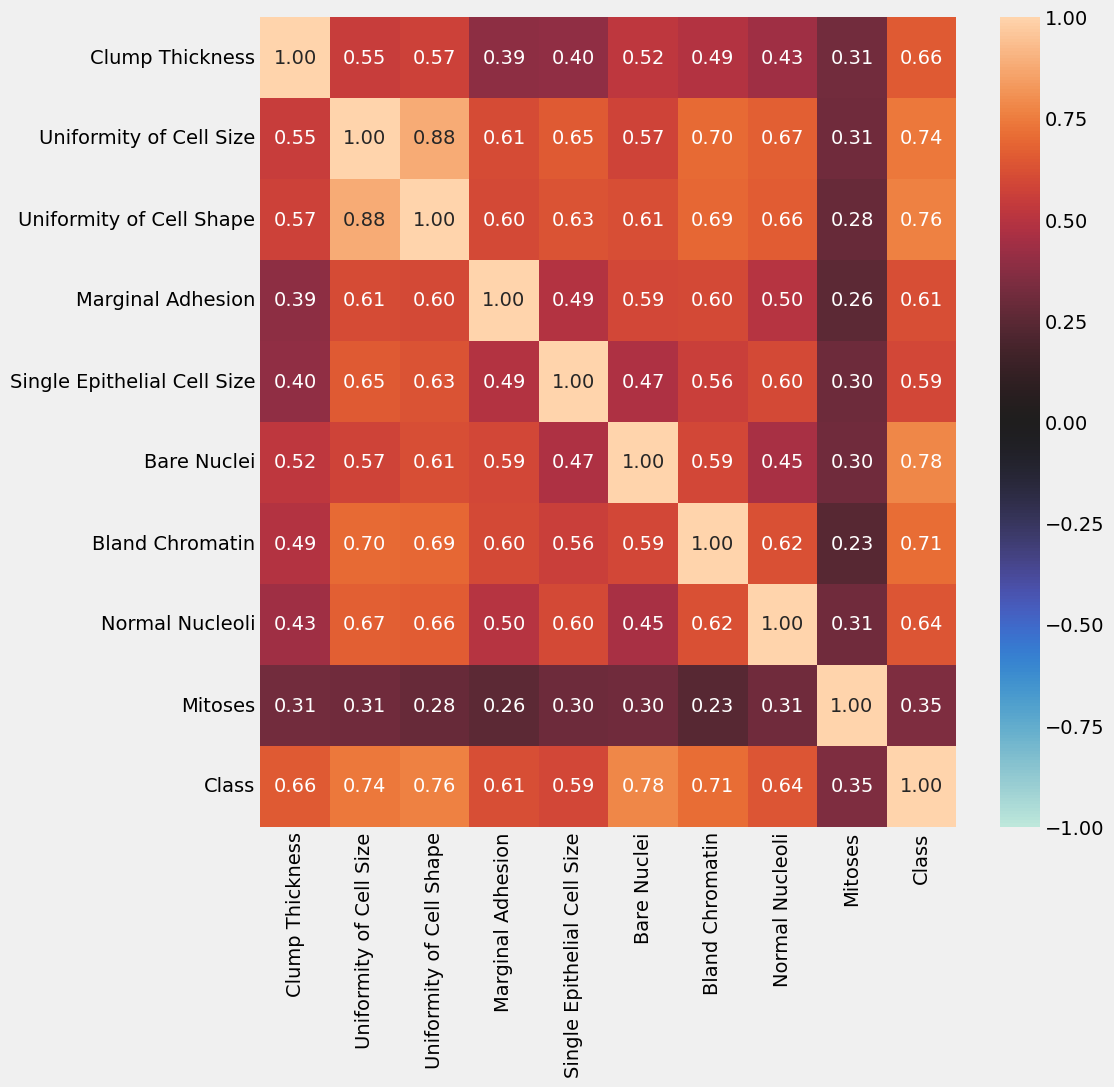

In [839]:
plt.figure(figsize=[10,10])
sns.heatmap(filtered_df.corr(),annot=True,vmin=-1,vmax=1,center=0,fmt='.2f')
plt.show()

In [840]:
corr_list = filtered_df.corr()
corr_list

Clump Thickness  Uniformity of Cell Size  \
Clump Thickness                     1.000000                 0.553860   
Uniformity of Cell Size             0.553860                 1.000000   
Uniformity of Cell Shape            0.565455                 0.876425   
Marginal Adhesion                   0.385230                 0.607947   
Single Epithelial Cell Size         0.395071                 0.654364   
Bare Nuclei                         0.518655                 0.572098   
Bland Chromatin                     0.488842                 0.702619   
Normal Nucleoli                     0.430863                 0.665566   
Mitoses                             0.314192                 0.312354   
Class                               0.655659                 0.742166   

                             Uniformity of Cell Shape  Marginal Adhesion  \
Clump Thickness                              0.565455           0.385230   
Uniformity of Cell Size                      0.876425           0.607947   
Uniformity of Cell Shape                     1.000000           0.597745   
Marginal Adhesion                            0.597745           1.000000   
Single Epithelial Cell Size                  0.628723           0.490849   
Bare Nuclei                                  0.611999           0.593516   
Bland Chromatin                              0.690597           0.598180   
Normal Nucleoli                              0.658878           0.496396   
Mitoses                                      0.283665           0.256575   
Class                                        0.759171           0.610845   

                             Single Epithelial Cell Size  Bare Nuclei  \
Clump Thickness                                 0.395071     0.518655   
Uniformity of Cell Size                         0.654364     0.572098   
Uniformity of Cell Shape                        0.628723     0.611999   
Marginal Adhesion                               0.490849     0.593516   
Single Epithelial Cell Size                     1.000000     0.471799   
Bare Nuclei                                     0.471799     1.000000   
Bland Chromatin                                 0.560044     0.592733   
Normal Nucleoli                                 0.598597     0.453453   
Mitoses                                         0.301596     0.304788   
Class                                           0.592058     0.779346   

                             Bland Chromatin  Normal Nucleoli   Mitoses  \
Clump Thickness                     0.488842         0.430863  0.314192   
Uniformity of Cell Size             0.702619         0.665566  0.312354   
Uniformity of Cell Shape            0.690597         0.658878  0.283665   
Marginal Adhesion                   0.598180         0.496396  0.256575   
Single Epithelial Cell Size         0.560044         0.598597  0.301596   
Bare Nuclei                         0.592733         0.453453  0.304788   
Bland Chromatin                     1.000000         0.621767  0.234417   
Normal Nucleoli                     0.621767         1.000000  0.309739   
Mitoses                             0.234417         0.309739  1.000000   
Class                               0.709569         0.638593  0.350601   

                                Class  
Clump Thickness              0.655659  
Uniformity of Cell Size      0.742166  
Uniformity of Cell Shape     0.759171  
Marginal Adhesion            0.610845  
Single Epithelial Cell Size  0.592058  
Bare Nuclei                  0.779346  
Bland Chromatin              0.709569  
Normal Nucleoli              0.638593  
Mitoses                      0.350601  
Class                        1.000000

In [841]:
# Filter the features that have a correlation of more than 0.5 with Class
high_corr_features = corr_list.index[abs(corr_list["Class"]) > 0.5]

# Print the features that meet the threshold
print(high_corr_features)

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Class'],
      dtype='object')


In [842]:
#Fixing Multicollinearity
# Set the threshold for correlation coefficient
threshold = 0.68

# Create a correlation matrix
corr_matrix = filtered_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Drop the highly correlated features
fixed_df = filtered_df.drop(to_drop, axis=1)

to_drop

C:\Users\mingc\AppData\Local\Temp\ipykernel_13548\3903402245.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['Uniformity of Cell Shape', 'Bland Chromatin', 'Class']

# Data Manipulation

In [843]:
#Splitting the data intro training & testing sets

m=[]
for i in filtered_df.columns.values:
    m.append(i.replace(' ','_'))
    
filtered_df.columns = m
X = filtered_df.drop("Class",axis=1)
Y = filtered_df["Class"]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  = ',X.shape,Y.shape,'\nTraining set  = ',Train_X.shape,Train_Y.shape,'\nTesting set   = ', Test_X.shape,Test_Y.shape)

Original set  =  (393, 9) (393,) 
Training set  =  (314, 9) (314,) 
Testing set   =  (79, 9) (79,)


In [844]:
#Feature Scaling (Standardization)

std = StandardScaler()
print('\033[1mStandardardization on Original set'.center(100))
X_std = std.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)
display(X_std.describe())

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Original set                               


Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
count     3.930000e+02             3.930000e+02              3.930000e+02   
mean     -5.423990e-17            -8.135986e-17              4.519992e-17   
std       1.001275e+00             1.001275e+00              1.001275e+00   
min      -1.433738e+00            -8.791776e-01             -9.590048e-01   
25%      -7.108912e-01            -8.791776e-01             -9.590048e-01   
50%       1.195548e-02            -2.043401e-01             -2.565092e-01   
75%       7.348022e-01             4.704974e-01              7.972342e-01   
max       1.819072e+00             2.157591e+00              2.202225e+00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size   Bare_Nuclei  \
count       3.930000e+02                 3.930000e+02  3.930000e+02   
mean        2.711995e-17                -6.327989e-17  4.519992e-17   
std         1.001275e+00                 1.001275e+00  1.001275e+00   
min        -7.802696e-01                -1.243365e+00 -8.719616e-01   
25%        -7.802696e-01                -6.861901e-01 -8.719616e-01   
50%        -4.269908e-01                -6.861901e-01 -6.038231e-01   
75%         2.795666e-01                 4.281599e-01  1.005007e+00   
max         2.399239e+00                 3.214035e+00  1.541284e+00   

       Bland_Chromatin  Normal_Nucleoli       Mitoses  
count     3.930000e+02     3.930000e+02  3.930000e+02  
mean      6.779988e-17    -2.711995e-17  1.039598e-16  
std       1.001275e+00     1.001275e+00  1.001275e+00  
min      -1.135978e+00    -7.497348e-01 -4.054301e-01  
25%      -7.363011e-01    -7.497348e-01 -4.054301e-01  
50%      -3.366238e-01    -7.497348e-01 -4.054301e-01  
75%       8.624079e-01     8.343823e-01 -4.054301e-01  
max       2.461117e+00     2.101676e+00  3.135326e+00

                               Standardardization on Training set                               


Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
count     3.140000e+02             3.140000e+02              3.140000e+02   
mean     -9.051500e-17             1.131437e-17              2.262875e-17   
std       1.001596e+00             1.001596e+00              1.001596e+00   
min      -1.473917e+00            -8.934293e-01             -9.848289e-01   
25%      -7.381301e-01            -8.934293e-01             -9.848289e-01   
50%      -2.343270e-03            -2.348922e-01             -3.006779e-01   
75%       7.334436e-01             4.236449e-01              7.255487e-01   
max       1.837124e+00             2.069988e+00              2.093851e+00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size   Bare_Nuclei  \
count       3.140000e+02                 3.140000e+02  3.140000e+02   
mean       -4.242891e-17                 7.354344e-17  6.505765e-17   
std         1.001596e+00                 1.001596e+00  1.001596e+00   
min        -7.714932e-01                -1.251030e+00 -8.830090e-01   
25%        -7.714932e-01                -6.954097e-01 -8.830090e-01   
50%        -4.162896e-01                -1.397897e-01 -6.132962e-01   
75%         2.941176e-01                 4.158302e-01  1.004981e+00   
max         2.425339e+00                 3.193930e+00  1.544407e+00   

       Bland_Chromatin  Normal_Nucleoli       Mitoses  
count       314.000000     3.140000e+02  3.140000e+02  
mean          0.000000     3.960031e-17 -1.357725e-16  
std           1.001596     1.001596e+00  1.001596e+00  
min          -1.156685    -7.722842e-01 -4.209698e-01  
25%          -0.755803    -7.722842e-01 -4.209698e-01  
50%          -0.354921    -6.146137e-01 -4.209698e-01  
75%           0.847725     8.044208e-01 -4.209698e-01  
max           2.451254     2.065785e+00  3.103951e+00


                                Standardardization on Testing set                                


Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
count        79.000000                79.000000                 79.000000   
mean         -0.072196                -0.176541                 -0.253047   
std           1.091151                 0.864370                  0.837434   
min          -1.473917                -0.893429                 -0.984829   
25%          -0.922077                -0.893429                 -0.984829   
50%          -0.002343                -0.564161                 -0.642753   
75%           0.917390                 0.094376                  0.383473   
max           1.837124                 2.069988                  2.093851   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count          79.000000                    79.000000    79.000000   
mean            0.064809                    -0.055392    -0.029487   
std             1.031735                     0.991086     1.035114   
min            -0.771493                    -1.251030    -0.883009   
25%            -0.771493                    -0.695410    -0.883009   
50%            -0.416290                    -0.695410    -0.613296   
75%             0.649321                     0.415830     1.274694   
max             2.425339                     2.638310     1.544407   

       Bland_Chromatin  Normal_Nucleoli    Mitoses  
count        79.000000        79.000000  79.000000  
mean         -0.085975        -0.129627  -0.086325  
std           1.018461         0.975799   0.980726  
min          -1.156685        -0.772284  -0.420970  
25%          -0.755803        -0.772284  -0.420970  
50%          -0.354921        -0.772284  -0.420970  
75%           0.446843         0.016068  -0.420970  
max           2.451254         2.065785   3.103951

# Modelling

In [845]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = filtered_df.drop('Class', axis=1)
y = filtered_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest Classifier 

In [846]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
classifier.fit(X_train, y_train)
rfc_acc = classifier.score(X_test, y_test)
print('Accuracy score',rfc_acc)    

Accuracy score 0.9491525423728814


## Support Vector Classifier

In [847]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
Y_Pred_svm = classifier.predict(X_test)

from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_Pred_svm , target_names=target_names))
svc_acc = accuracy_score(y_test,Y_Pred_svm)
print("\nAccuracy Score:", svc_acc)

              precision    recall  f1-score   support

     class 0       0.93      0.95      0.94        60
     class 1       0.95      0.93      0.94        58

    accuracy                           0.94       118
   macro avg       0.94      0.94      0.94       118
weighted avg       0.94      0.94      0.94       118


Accuracy Score: 0.940677966101695


## Bagging Classifier 

In [848]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
bc_acc = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.8f}'.format(bc_acc)) 

C:\Users\mingc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test set accuracy of bc: 0.93220339


## Gradient Boosting Classifier 

In [849]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf.fit(X_train, y_train)
Y_Pred_boost = clf.predict(X_test)
gbc_acc = accuracy_score(y_test, Y_Pred_boost)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, Y_Pred_boost , target_names=target_names))
print('Accuracy Score: ',gbc_acc)

              precision    recall  f1-score   support

     class 0       0.90      0.93      0.92        60
     class 1       0.93      0.90      0.91        58

    accuracy                           0.92       118
   macro avg       0.92      0.91      0.92       118
weighted avg       0.92      0.92      0.92       118

Accuracy Score:  0.9152542372881356


## ADA Boost Classifier

In [850]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score    

model = DecisionTreeClassifier(criterion='entropy', max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator=model, n_estimators=50, learning_rate=1)
boostmodel = AdaBoost.fit(X_train, y_train)
y_pred_ada = boostmodel.predict(X_test)
ada_acc = accuracy_score(y_test,y_pred_ada)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_ada , target_names=target_names))
print('Accuracy Score: ',ada_acc)

C:\Users\mingc\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


              precision    recall  f1-score   support

     class 0       0.90      0.93      0.92        60
     class 1       0.93      0.90      0.91        58

    accuracy                           0.92       118
   macro avg       0.92      0.91      0.92       118
weighted avg       0.92      0.92      0.92       118

Accuracy Score:  0.9152542372881356


<Axes: >

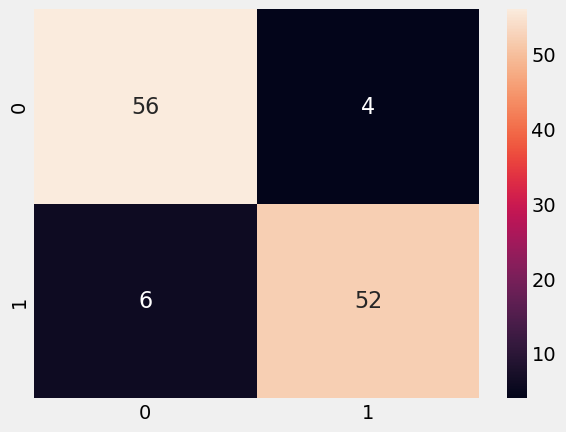

In [851]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, y_pred_ada)
sn.heatmap(cm, annot=True, annot_kws={"size": 16})
     

## K-Nearest Neighbor(KNN) Classifier

In [852]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
predic_knn=neigh.predict(X_test)
acc_test = accuracy_score(y_test, predic_knn)
print('Test set accuracy of bc: {:.8f}'.format(acc_test)) 
     

Test set accuracy of bc: 0.94915254


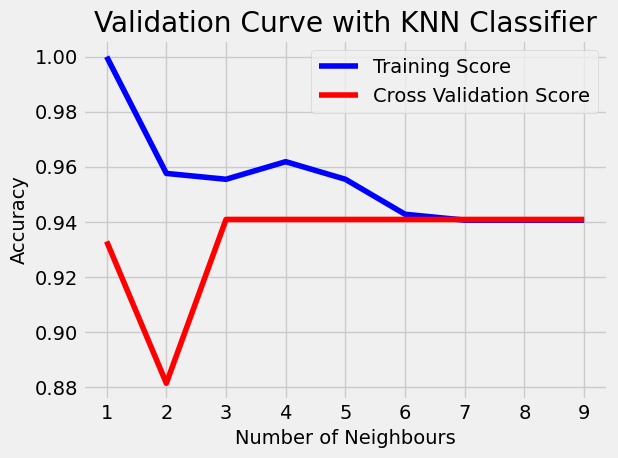

In [853]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
parameter_range = np.arange(1, 10, 1)
train_score, test_score = validation_curve(KNeighborsClassifier(), X_test, y_test,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                        cv = 5, scoring = "accuracy")

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'r')

plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

# Comparison of Model Evaluation

In [854]:
# Create comparison matrix of accuracy scores
Model_Evaluation_Comparison_Matrix = pd.DataFrame({'Model':['Random Forest Classifier','Support Vector Classifier','Bagging Classifier','Boosting Classifier','ADA Boost Classifier','K Neighbors Classifier']
                                                  ,0:[(rf_acc*100),(svc_acc*100),(bc_acc*100),(gbc_acc*100),(ada_acc*100),(acc_test*100)]})
Model_Evaluation_Comparison_Matrix= Model_Evaluation_Comparison_Matrix.rename(columns={0:'Accuracy Score'})
Model_Evaluation_Comparison_Matrix

Model  Accuracy Score
0   Random Forest Classifier       94.915254
1  Support Vector Classifier       94.067797
2         Bagging Classifier       93.220339
3        Boosting Classifier       91.525424
4       ADA Boost Classifier       91.525424
5     K Neighbors Classifier       94.915254